In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Import statements required for Plotly
# Plotly is used to get details when hovered
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [0]:
attrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [0]:
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Text(0.5, 1.0, 'Attrition Breakdown')

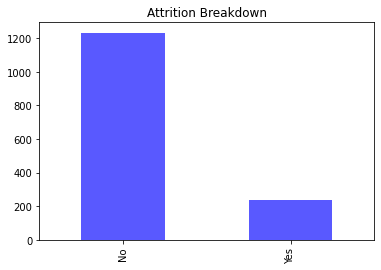

In [0]:
attrition.Attrition.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Attrition Breakdown")


Text(0, 0.5, 'Frequency of Attrition')

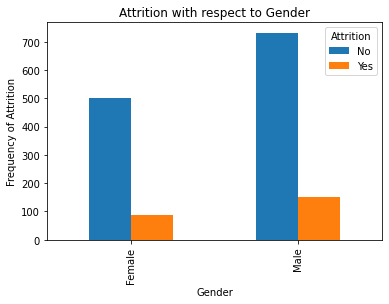

In [0]:
pd.crosstab(attrition.Gender,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

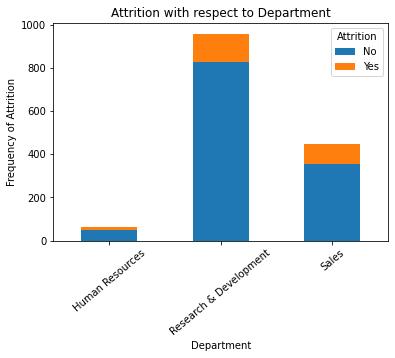

In [0]:
pd.crosstab(attrition.Department,attrition.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Text(0, 0.5, 'Frequency of Attrition')

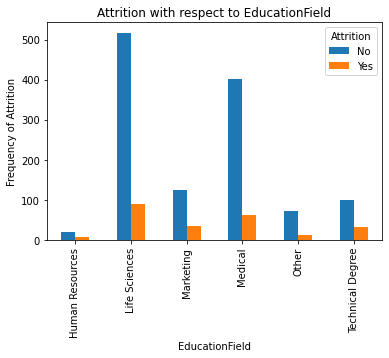

In [0]:
pd.crosstab(attrition['EducationField'],attrition['Attrition']).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

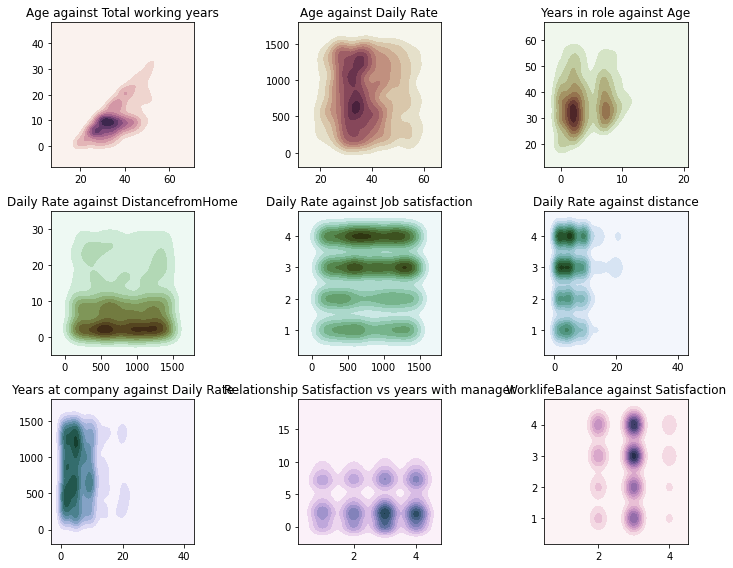

In [0]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8),
sharex=False, sharey=False)
# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')
cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')
cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')
cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')
cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')
f.tight_layout()

In [0]:
attrition_tar= attrition.drop(['Attrition'], axis=1)#Dropping of target class
y=attrition['Attrition']
# Import the train_test_split method
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit
# Split data into train and test sets as well as for validation and testing
x_train, x_test, y_train, y_test = train_test_split(attrition_tar,
y,
train_size= 0.80,
random_state=0);

In [0]:
def encoding(data):
  # Empty list to store columns with categorical data
  categorical = []
  for col, value in data.iteritems():
    if value.dtype == 'object':
      categorical.append(col)
  # Store the numerical columns in a list numerical
  numerical = data.columns.difference(categorical)
  attrition_cat = data[categorical]
  attrition_cat = pd.get_dummies(attrition_cat)
  # Store the numerical features to a dataframe attrition_num
  attrition_num = data[numerical]
  # Concat the two dataframes together columnwise
  attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
  print(attrition_final.columns)
  return attrition_final

x_train_encode=encoding(x_train)
x_test_encode=encoding(x_test)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [0]:
def target_encode(data):
  # Define a dictionary for the target mapping
  target_map = {'Yes':1, 'No':0}
  # Use the pandas apply method to numerically encode our attrition target variable
  target = data.apply(lambda x: target_map[x])
  return target
  
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

In [0]:
oversampler=SMOTE(random_state=0)
smote_train,smote_target=oversampler.fit_sample(x_train_encode,y_train_encode)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
seed = 0 # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
'n_jobs': -1,
'n_estimators': 1000,
# 'warm_start': True,
'max_features': 0.3,
'max_depth': 4,
'min_samples_leaf': 2,
'max_features' : 'sqrt',
'random_state' : seed,
'verbose': 0
}
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(x_test_encode)


print("Accuracy score: {}".format(accuracy_score(y_test_encode, rf_predictions)))
print("="*80)
print(classification_report(y_test_encode, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



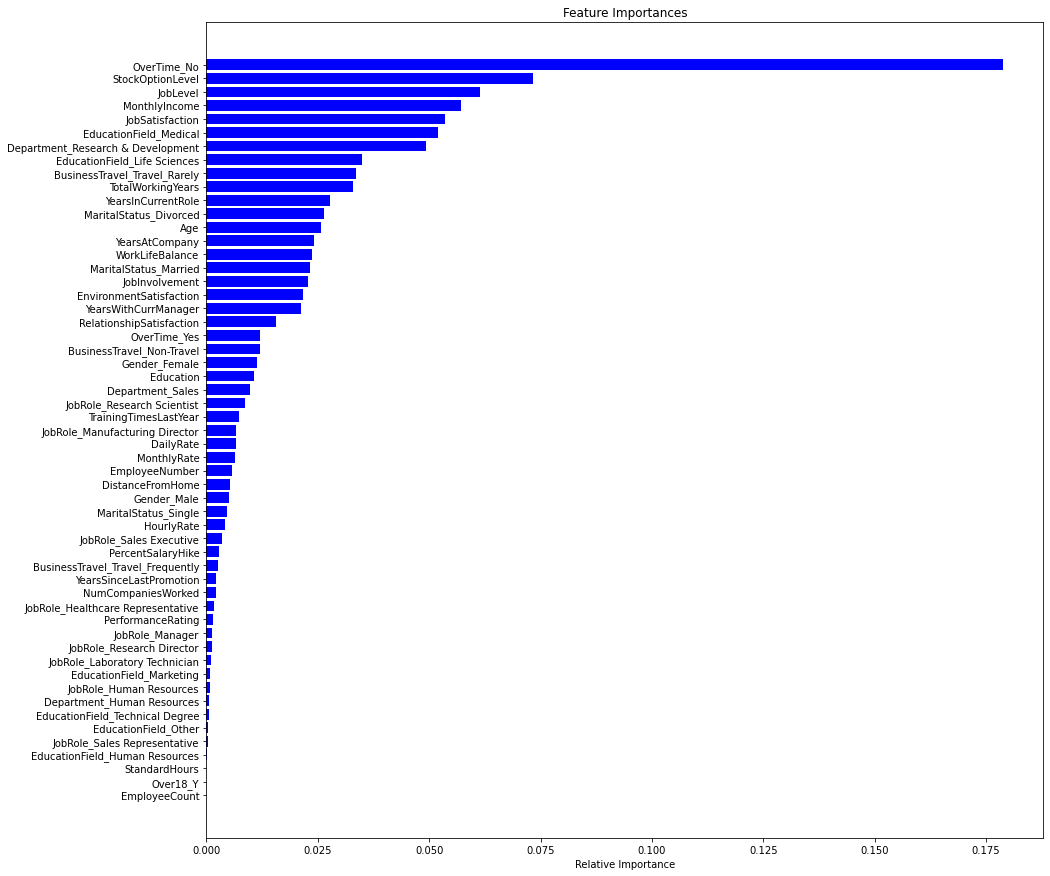

In [0]:
features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
# Gradient Boosting Parameters
gb_params ={
'n_estimators': 1500,
'max_features': 0.9,
'learning_rate' : 0.25,
'max_depth': 4,
'min_samples_leaf': 2,
'subsample': 1,
'max_features' : 'sqrt',
'random_state' : seed,
'verbose': 0
}
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(x_test_encode)
print(accuracy_score(y_test_encode, gb_predictions))
print("="*80)
print(classification_report(y_test_encode, gb_predictions))



0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.64      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294



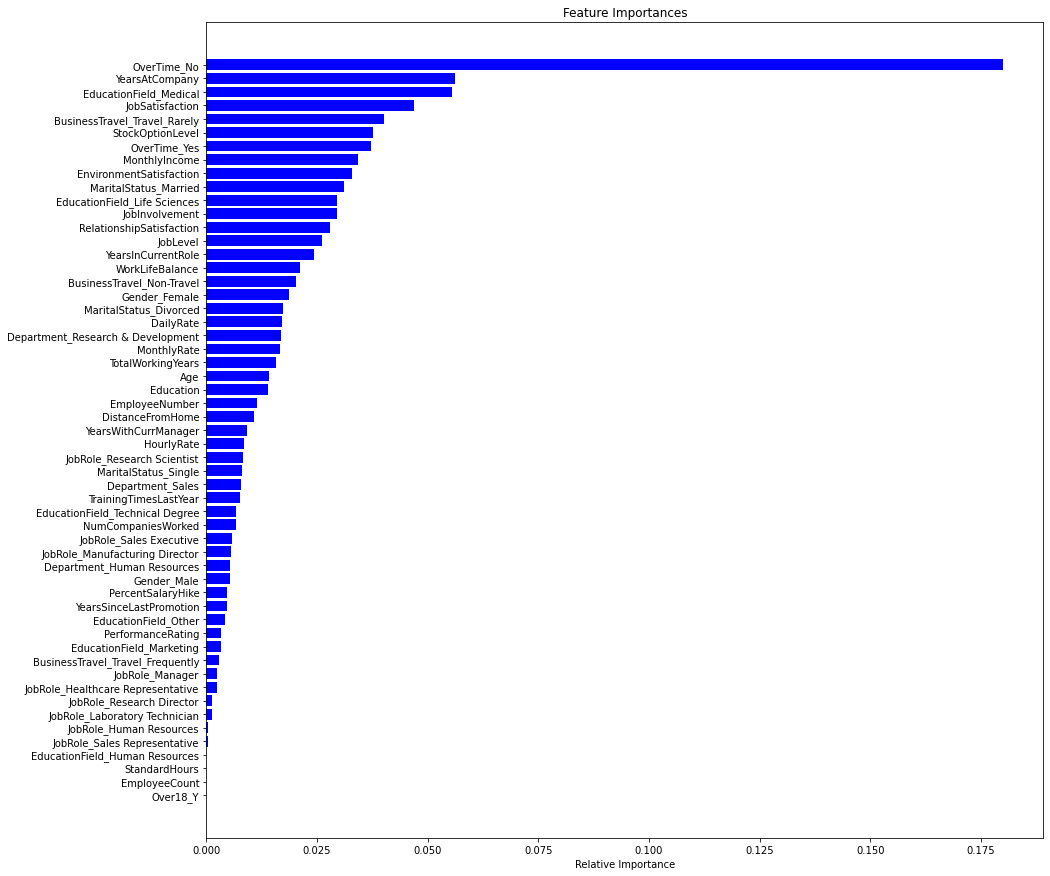

In [0]:
features = x_train_encode.columns.values
importances = gb.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)
dt_predictions = dt.predict(x_test_encode)
print("Accuracy score: {}".format(accuracy_score(y_test_encode, dt_predictions)))
print("="*80)
print(classification_report(y_test_encode, dt_predictions))

Accuracy score: 0.7380952380952381
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       245
           1       0.28      0.37      0.32        49

    accuracy                           0.74       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.77      0.74      0.75       294



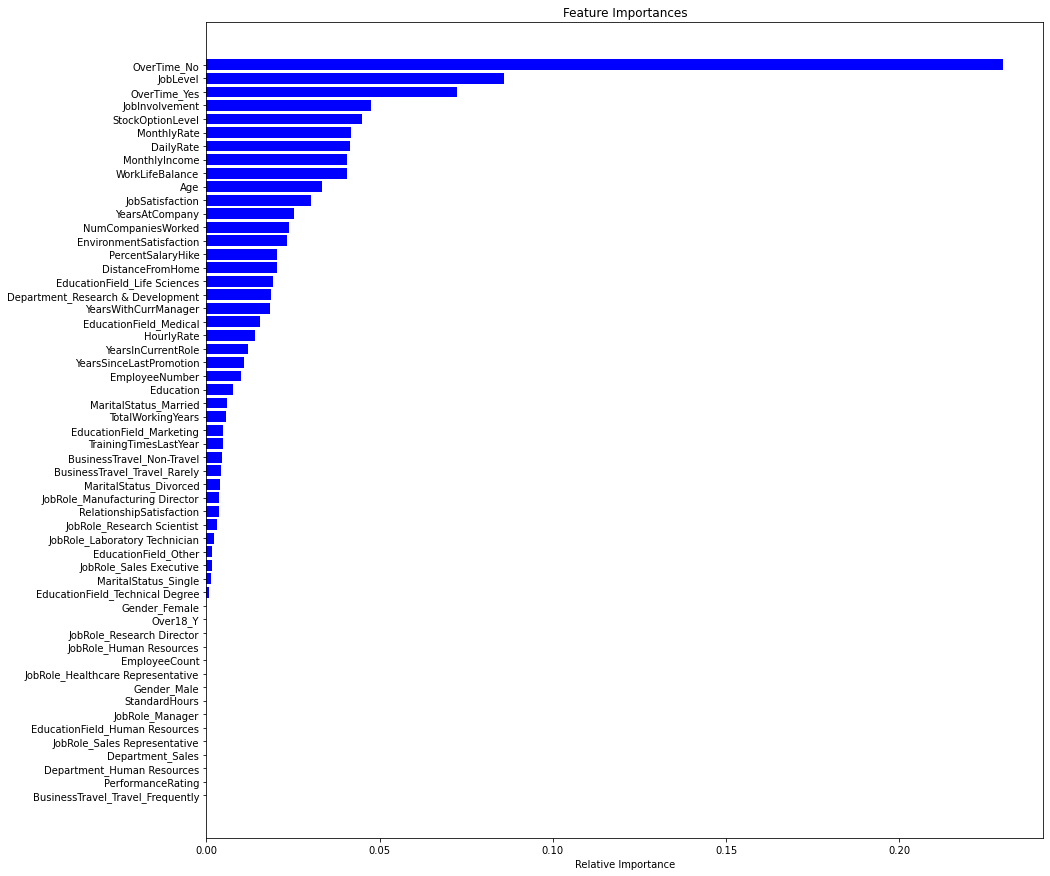

In [0]:
features = x_train_encode.columns.values
importances = dt.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()